# Chapter 8: Forecasting

## 8.3 Moving Average

### 8.3.1 Loading and visualizing the time series dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

wsb_df = pd.read_csv( 'wsb.csv' )
wsb_df.head(10)

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1
5,6,4377766,156,0
6,7,2798343,98,1
7,8,4303668,144,0
8,9,2958185,112,1
9,10,3623386,120,0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

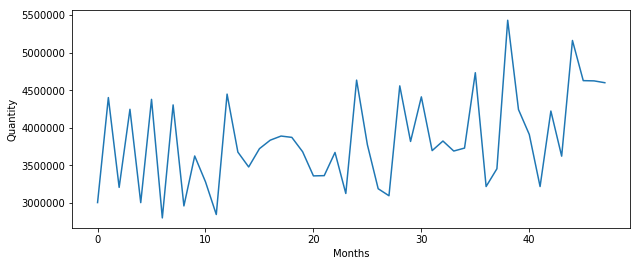

In [4]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( wsb_df['Sale Quantity'] );

In [5]:
wsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
Month                    48 non-null int64
Sale Quantity            48 non-null int64
Promotion Expenses       48 non-null int64
Competition Promotion    48 non-null int64
dtypes: int64(4)
memory usage: 1.6 KB


### 8.3.2  Forecasting using Moving Average

In [6]:
wsb_df['mavg_12'] = wsb_df['Sale Quantity'].rolling( window = 12 ).mean().shift(1)

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
wsb_df[['Sale Quantity', 'mavg_12']][0:]

,Sale Quantity,mavg_12
0,3002666,nan
1,4401553,nan
2,3205279,nan
3,4245349,nan
4,3001940,nan
5,4377766,nan
6,2798343,nan
7,4303668,nan
8,2958185,nan
9,3623386,nan


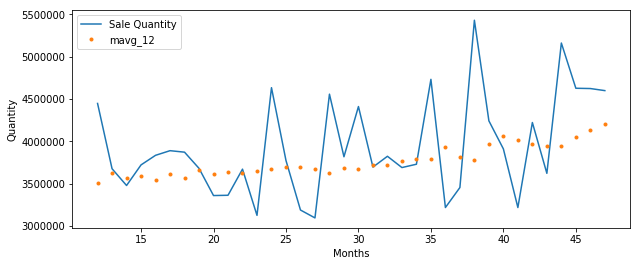

In [8]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( wsb_df['Sale Quantity'][12:] );
plt.plot( wsb_df['mavg_12'][12:], '.' );
plt.legend();

### 8.3.3  Calculating forecast accuracy

#### 8.3.3.2 Root mean square error

In [9]:
import numpy as np

def get_mape(actual, predicted): 
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round( np.mean(np.abs((actual - predicted) / actual)) * 100, 2 )

In [10]:
get_mape( wsb_df['Sale Quantity'][36:].values, 
          wsb_df['mavg_12'][36:].values)

14.04

In [11]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error( wsb_df['Sale Quantity'][36:].values, 
                            wsb_df['mavg_12'][36:].values))

734725.8359239782

### 8.3.4 Exponential Smoothing

In [12]:
wsb_df['ewm'] = wsb_df['Sale Quantity'].ewm( alpha = 0.2 ).mean()

In [13]:
pd.options.display.float_format = '{:.2f}'.format

In [14]:
wsb_df[36:]

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,ewm
36,37,3216483,121,1,3928410.33,3828234.64
37,38,3453239,128,0,3810280.00,3753219.93
38,39,5431651,170,0,3783643.33,4088961.93
39,40,4241851,160,0,3970688.42,4119543.81
40,41,3909887,151,1,4066369.08,4077607.99
41,42,3216438,120,1,4012412.75,3905359.34
42,43,4222005,152,0,3962369.58,3968692.78
43,44,3621034,125,0,3946629.42,3899157.24
44,45,5162201,170,0,3940489.50,4151776.99
45,46,4627177,160,0,4052117.17,4246860.31


In [15]:
get_mape( wsb_df[['Sale Quantity']][36:].values, 
          wsb_df[['ewm']][36:].values)

11.15

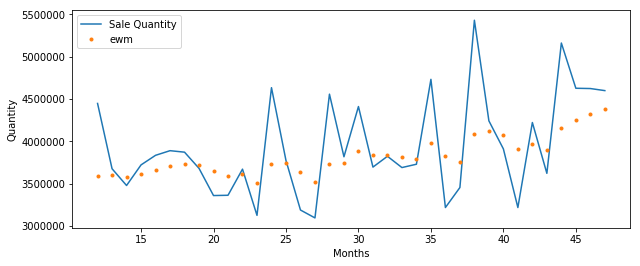

In [16]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( wsb_df['Sale Quantity'][12:] );
plt.plot( wsb_df['ewm'][12:], '.' );
plt.legend();

## 8.4 Decomposing Time Series

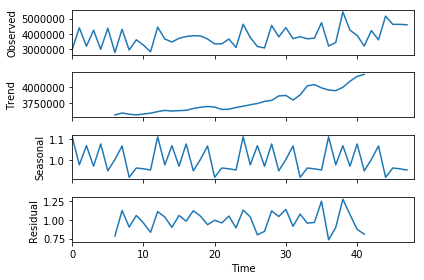

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_decompse = seasonal_decompose( np.array(wsb_df['Sale Quantity']), 
                                  model='multiplicative',   
                                 freq = 12 )

## Plotting the deocompsed time series components
ts_plot = ts_decompse.plot()

In [18]:
wsb_df['seasonal'] = ts_decompse.seasonal
wsb_df['trend'] = ts_decompse.trend

## 8.5 Auto Regressive Integrated Moving Average Models (ARIMA)

### 8.5.1 Auto Regression (AR) Models

In [19]:
vimana_df = pd.read_csv('vimana.csv')

vimana_df.head(5)

,Month,demand
0,1,457
1,2,439
2,3,404
3,4,392
4,5,403


In [20]:
vimana_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
Month     37 non-null int64
demand    37 non-null int64
dtypes: int64(2)
memory usage: 672.0 bytes


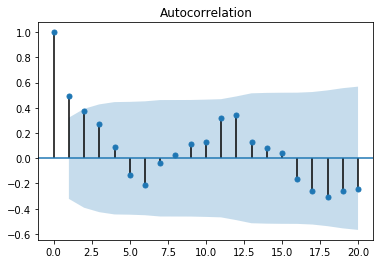

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Show autocorrelation upto lag 10
acf_plot = plot_acf( vimana_df.demand, 
                     lags=20)

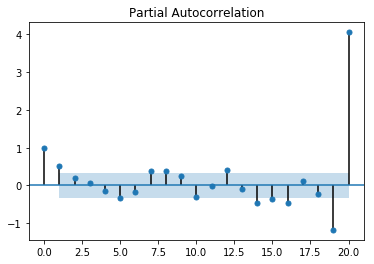

In [22]:
pacf_plot = plot_pacf( vimana_df.demand, 
                      lags=20 )

#### Building AR Model

In [23]:
from statsmodels.tsa.arima_model import ARIMA 

In [24]:
arima = ARIMA( vimana_df.demand[0:30].astype(np.float64).as_matrix(), 
              order = (1,0,0))
ar_model = arima.fit()

In [25]:
ar_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 375.7336
Dependent Variable: y                Log-Likelihood:      -182.77 
Date:               2019-04-23 22:00 Scale:               1.0000  
No. Observations:   30               Method:              css-mle 
Df Model:           2                Sample:              0       
Df Residuals:       28                                    0       
Converged:          1.0000           S.D. of innovations: 106.593 
No. Iterations:     14.0000          HQIC:                372.875 
AIC:                371.5300                                      
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       513.4433   35.9147  14.2962  0.0000  443.0519  583.8348
ar.L1.y       0.4726    0.1576   2.9995  0.0056    0.1638    0.7814
---------------------------------------------------------------------------
               Real           Imaginary          Modulus          Frequency
---------------------------------------------------------------------------
AR.1          2.1161             0.0000           2.1161             0.0000
==================================================================

"""

####  Forecast and Measure Accuracy

In [26]:
forecast_31_37 = ar_model.predict(30, 36)

In [27]:
forecast_31_37

array([480.15343682, 497.71129378, 506.00873185, 509.92990963,
       511.78296777, 512.65868028, 513.07252181])

In [28]:
get_mape( vimana_df.demand[30:], 
         forecast_31_37 )

19.12

### 8.5.2 Moving Average (MA) Processes

In [29]:
arima = ARIMA( vimana_df.demand[0:30].astype(np.float64).as_matrix(), 
              order = (0,0,1))
ma_model = arima.fit()
ma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 378.7982
Dependent Variable: y                Log-Likelihood:      -184.30 
Date:               2019-04-23 22:00 Scale:               1.0000  
No. Observations:   30               Method:              css-mle 
Df Model:           2                Sample:              0       
Df Residuals:       28                                    0       
Converged:          1.0000           S.D. of innovations: 112.453 
No. Iterations:     15.0000          HQIC:                375.939 
AIC:                374.5946                                      
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       516.5440   26.8307  19.2520  0.0000  463.9569  569.1312
ma.L1.y       0.3173    0.1421   2.2327  0.0337    0.0388    0.5958
--------------------------------------------------------------------------
                 Real          Imaginary         Modulus         Frequency
--------------------------------------------------------------------------
MA.1           -3.1518            0.0000          3.1518            0.5000
==================================================================

"""

In [30]:
forecast_31_37 = ma_model.predict(30, 36)
get_mape( vimana_df.demand[30:], 
         forecast_31_37 )

17.8

### 8.5.3 ARMA Model

In [31]:
arima = ARIMA( vimana_df.demand[0:30].astype(np.float64).as_matrix(), 
              order = (1,0,1))
arma_model = arima.fit()
arma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 377.2964
Dependent Variable: y                Log-Likelihood:      -181.85 
Date:               2019-04-23 22:00 Scale:               1.0000  
No. Observations:   30               Method:              css-mle 
Df Model:           3                Sample:              0       
Df Residuals:       27                                    0       
Converged:          1.0000           S.D. of innovations: 103.223 
No. Iterations:     21.0000          HQIC:                373.485 
AIC:                371.6916                                      
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       508.3995   45.3279  11.2160  0.0000  419.5585  597.2405
ar.L1.y       0.7421    0.1681   4.4158  0.0001    0.4127    1.0715
ma.L1.y      -0.3394    0.2070  -1.6401  0.1126   -0.7451    0.0662
---------------------------------------------------------------------------
               Real           Imaginary          Modulus          Frequency
---------------------------------------------------------------------------
AR.1          1.3475             0.0000           1.3475             0.0000
MA.1          2.9461             0.0000           2.9461             0.0000
==================================================================

"""

In [32]:
forecast_31_37 = arma_model.predict(30, 36)
get_mape( vimana_df.demand[30:], 
         forecast_31_37 )

20.27

### 8.5.4 ARIMA Model

#### 8.5.4.1 What is stationary data?

In [33]:
store_df = pd.read_excel('store.xls')

In [34]:
store_df.head(5)

,Date,demand
0,2014-10-01,15
1,2014-10-02,7
2,2014-10-03,8
3,2014-10-04,10
4,2014-10-05,13


In [35]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
Date      115 non-null datetime64[ns]
demand    115 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [36]:
store_df.set_index( pd.to_datetime(store_df.Date), inplace= True)
store_df.drop('Date', axis = 1, inplace = True)
store_df[-5:]

,demand
Date,
2015-01-19,18
2015-01-20,22
2015-01-21,22
2015-01-22,21
2015-01-23,17


Now we will draw the ACF plot to verify stationarity.

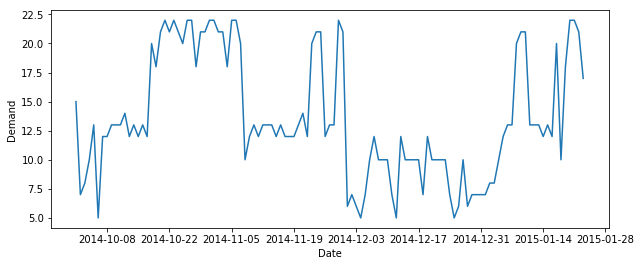

In [37]:
plt.figure( figsize=(10,4))
plt.xlabel( "Date" )
plt.ylabel( "Demand" )
plt.plot( store_df.demand );

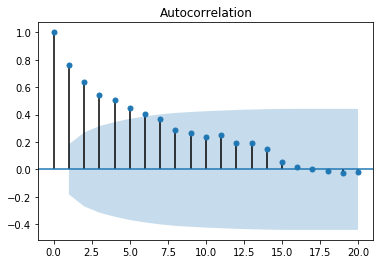

In [38]:
acf_plot = plot_acf( store_df.demand, 
                     lags=20 )

#### 8.5.4.2 Dicky-Fuller Test

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
def adfuller_test( ts ):
    adfuller_result = adfuller( ts, autolag=None )
    adfuller_out = pd.Series(adfuller_result[0:4], 
                         index=['Test Statistic',
                                'p-value',
                                'Lags Used',
                                'Number of Observations Used'])
    print( adfuller_out )

In [41]:
adfuller_test( store_df.demand )

Test Statistic                 -1.65
p-value                         0.46
Lags Used                      13.00
Number of Observations Used   101.00
dtype: float64


#### 8.5.4.3 Differencing 

In [42]:
store_df['demand_diff'] = store_df.demand - store_df.demand.shift(1)

In [43]:
store_df.head(5)

,demand,demand_diff
Date,,
2014-10-01,15,nan
2014-10-02,7,-8.00
2014-10-03,8,1.00
2014-10-04,10,2.00
2014-10-05,13,3.00


In [44]:
store_diff_df = store_df.dropna()

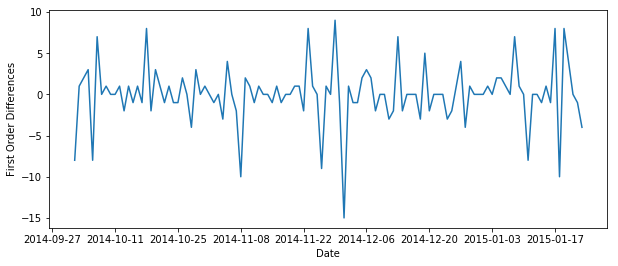

In [45]:
plt.figure( figsize=(10,4))
plt.xlabel( "Date" )
plt.ylabel( "First Order Differences" )
plt.plot( store_diff_df.demand_diff );

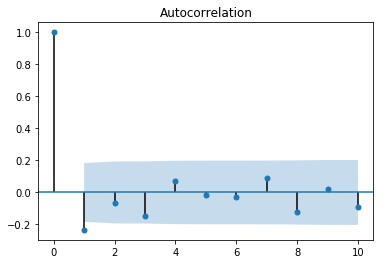

In [46]:
pacf_plot = plot_acf( store_df.demand_diff.dropna(), 
                       lags=10 )

In [47]:
store_train = store_df[0:100]
store_test = store_df[100:]

In [48]:
arima = ARIMA( store_train.demand.astype(np.float64).as_matrix(), 
               order = (1,1,1))
arima_model = arima.fit()
arima_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
==================================================================
Model:              ARIMA            BIC:                 532.1510
Dependent Variable: D.y              Log-Likelihood:      -256.89 
Date:               2019-04-23 22:00 Scale:               1.0000  
No. Observations:   99               Method:              css-mle 
Df Model:           3                Sample:              1       
Df Residuals:       96                                    0       
Converged:          1.0000           S.D. of innovations: 3.237   
No. Iterations:     10.0000          HQIC:                525.971 
AIC:                521.7706                                      
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const           0.0357    0.1599   0.2232  0.8238  -0.2776   0.3490
ar.L1.D.y       0.4058    0.2294   1.7695  0.0800  -0.0437   0.8554
ma.L1.D.y      -0.7155    0.1790  -3.9972  0.0001  -1.0663  -0.3647
---------------------------------------------------------------------------
               Real           Imaginary          Modulus          Frequency
---------------------------------------------------------------------------
AR.1          2.4641             0.0000           2.4641             0.0000
MA.1          1.3977             0.0000           1.3977             0.0000
==================================================================

"""

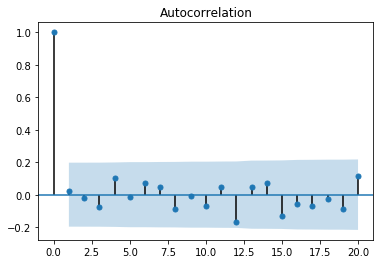

In [49]:
acf_plot = plot_acf(arima_model.resid, 
                    lags = 20)

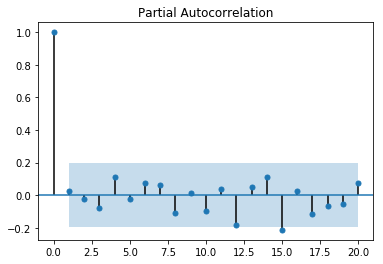

In [50]:
pacf_plot = plot_pacf(arima_model.resid, 
                      lags = 20)

#### 8.5.4.4 Forecast and measure accuracy

In [51]:
store_predict, stderr, ci = arima_model.forecast(steps = 15)

In [52]:
store_predict

array([17.32364962, 16.2586981 , 15.84770837, 15.70211912, 15.66423863,
       15.67007012, 15.69364144, 15.7244122 , 15.75810475, 15.79298307,
       15.8283426 , 15.86389744, 15.89953153, 15.93519779, 15.9708771 ])

In [53]:
get_mape( store_df.demand[100:], 
          store_predict )

24.17